**Import necessary libraries**

In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(color_codes=True)

In [22]:
# Load dataset
df = pd.read_csv("/content/heart_disease.csv")

# **2) Encoding Categorical Variables**
## **2.1 Label Encoding**

In [23]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Binary categorical columns
binary_cols = ['Gender', 'Smoking', 'Family Heart Disease', 'Diabetes',
               'High Blood Pressure', 'Low HDL Cholesterol',
               'High LDL Cholesterol', 'Heart Disease Status']

label_encoder = LabelEncoder()
for col in binary_cols:
    df_balanced[col] = label_encoder.fit_transform(df_balanced[col])

## **2.2 One-Hot Encoding**

In [24]:
# One-Hot Encoding for multi categorical columns(more than 2 classes)
multi_cols = ['Exercise Habits', 'Alcohol Consumption', 'Stress Level']

# Check if columns exist before attempting to one-hot encode
# This check prevents the KeyError if the cell is run multiple times
existing_multi_cols = [col for col in multi_cols if col in df_balanced.columns]

if existing_multi_cols:
    df_balanced = pd.get_dummies(df_balanced, columns=existing_multi_cols, drop_first=True)
    print(f"One-hot encoded columns: {existing_multi_cols}")
else:
    print("Specified multi_cols not found in DataFrame. They might have been encoded already.")

Specified multi_cols not found in DataFrame. They might have been encoded already.


In [25]:
# Convert boolean columns to integers
bool_cols = df_balanced.select_dtypes(include='bool').columns
df_balanced[bool_cols] = df_balanced[bool_cols].astype(int)

# Check
print(df_balanced.head())
print(df_balanced.count())


    Age  Gender  Blood Pressure  Cholesterol Level  Smoking  \
0  29.0       1           152.0              213.0        0   
1  53.0       0           144.0              253.0        1   
2  37.0       1           139.0              283.0        1   
3  52.0       0           175.0              275.0        1   
4  66.0       1           132.0              240.0        0   

   Family Heart Disease  Diabetes        BMI  High Blood Pressure  \
0                     1         0  23.405044                    1   
1                     1         0  21.030990                    0   
2                     1         1  27.708483                    0   
3                     0         0  37.725994                    1   
4                     0         0  25.976203                    0   

   Low HDL Cholesterol  ...  Fasting Blood Sugar  CRP Level  \
0                    1  ...                125.0   3.715720   
1                    1  ...                149.0  11.526008   
2                

In [26]:
print(f"Original dataset shape: {df_balanced.shape}")

Original dataset shape: (2870, 24)


# **Visual Methods**

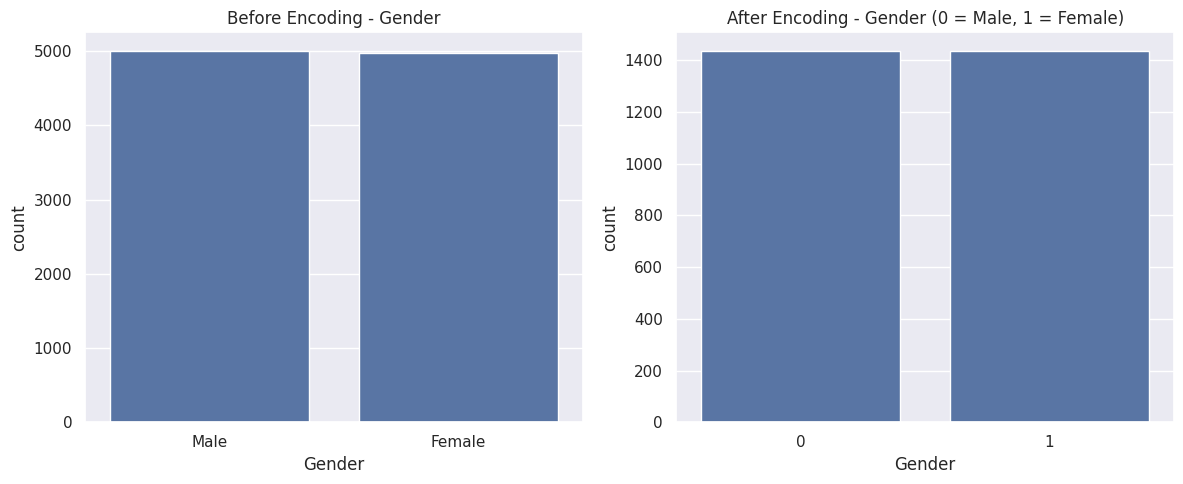

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 2, figsize=(12,5))

# Before Encoding
sns.countplot(data=df, x='Gender', ax=axes[0])
axes[0].set_title("Before Encoding - Gender")

# After Encoding
sns.countplot(x=df_balanced['Gender'], ax=axes[1])
axes[1].set_title("After Encoding - Gender (0 = Male, 1 = Female)")

plt.tight_layout()
plt.show()


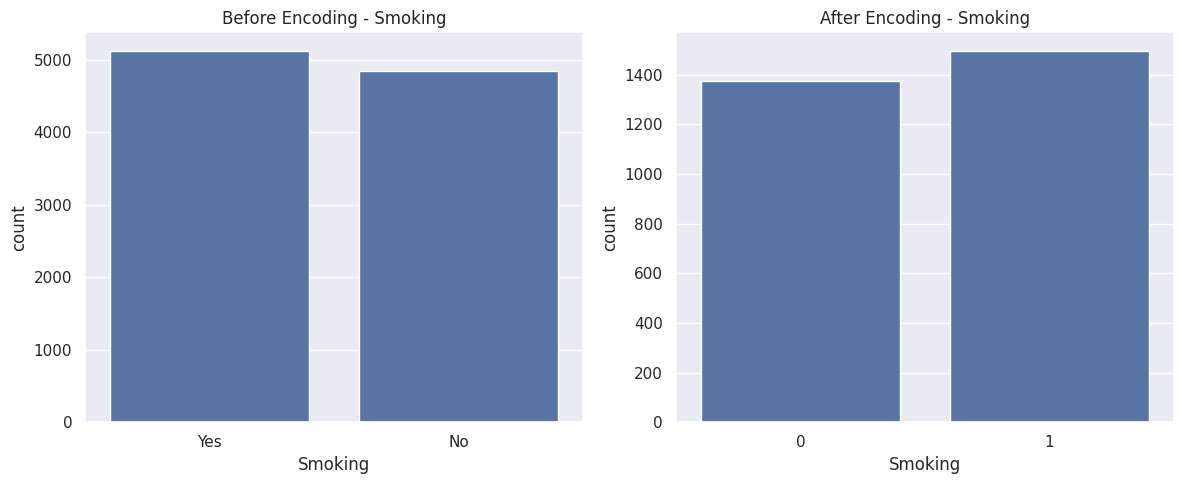

In [30]:
fig, axes = plt.subplots(1, 2, figsize=(12,5))

# Before
sns.countplot(data=df, x='Smoking', ax=axes[0])
axes[0].set_title("Before Encoding - Smoking")

# After
sns.countplot(x=df_balanced['Smoking'], ax=axes[1])
axes[1].set_title("After Encoding - Smoking")

plt.tight_layout()
plt.show()


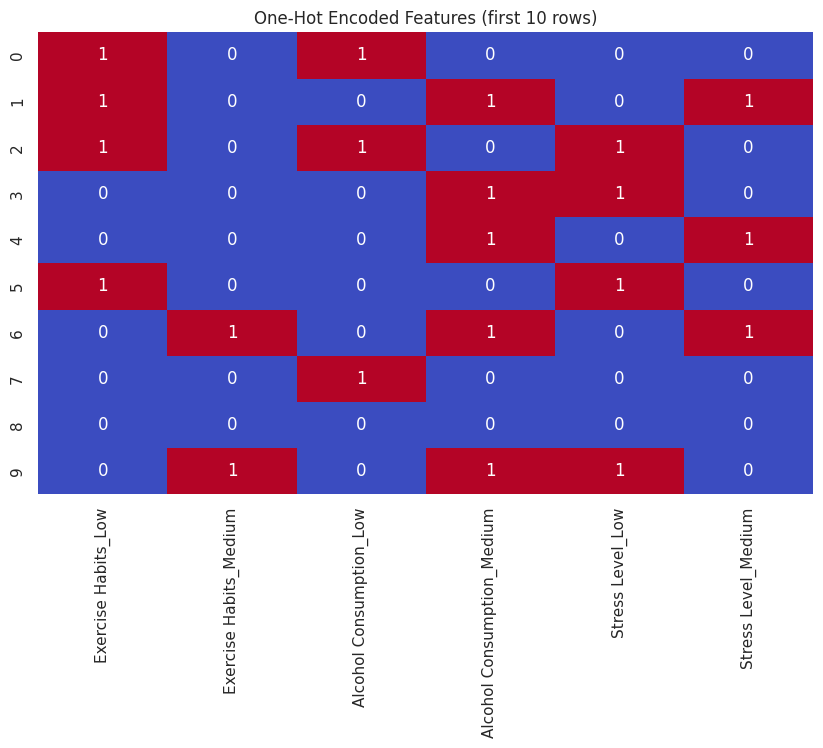

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# Find all new one-hot encoded columns created
encoded_cols = [col for col in df_balanced.columns if any(prefix in col for prefix in multi_cols)]

# Example: Show first 10 rows of the encoded features
plt.figure(figsize=(10,6))
sns.heatmap(df_balanced[encoded_cols].head(10), annot=True, cmap="coolwarm", cbar=False)
plt.title("One-Hot Encoded Features (first 10 rows)")
plt.show()


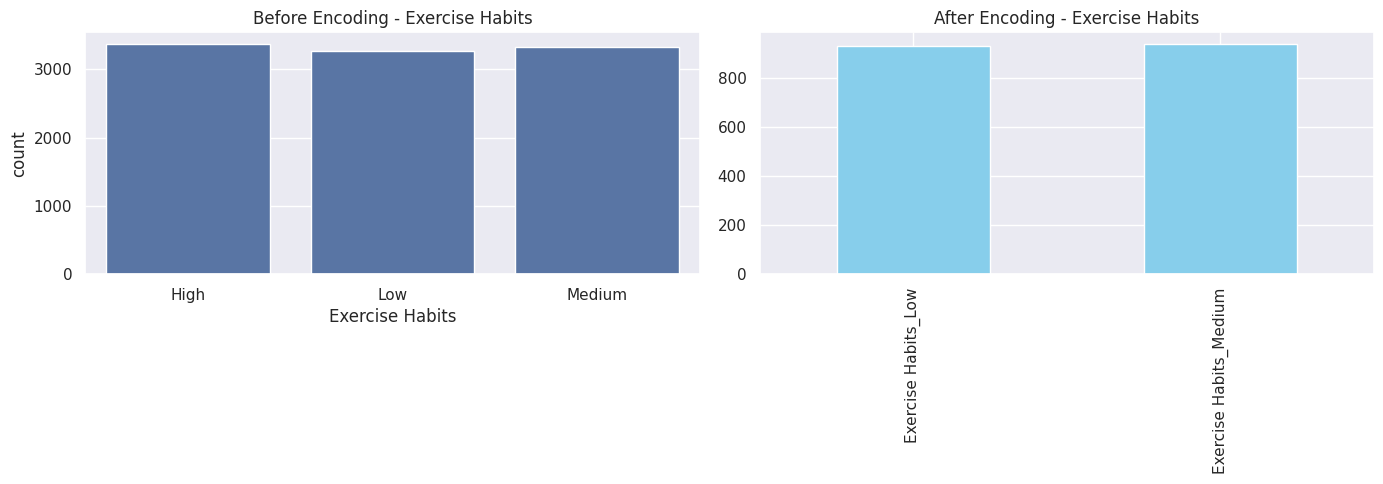

In [32]:
# Example for Exercise Habits
fig, axes = plt.subplots(1, 2, figsize=(14,5))

# Before encoding (if you still have the original column in df)
sns.countplot(data=df, x='Exercise Habits', ax=axes[0])
axes[0].set_title("Before Encoding - Exercise Habits")

# After encoding (from df_balanced)
df_balanced.filter(like="Exercise Habits").sum().plot(kind="bar", ax=axes[1], color="skyblue")
axes[1].set_title("After Encoding - Exercise Habits")

plt.tight_layout()
plt.show()